<a href="https://colab.research.google.com/github/maxparfullthrottle/Scikit-Learn/blob/master/kerasTuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
#!pip install keras-tuner
import kerastuner
print(kerastuner.__version__)

2.4.1
2.4.3
1.0.2


In [17]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()   #get the data

print(x_train.shape)

(60000, 28, 28)


9


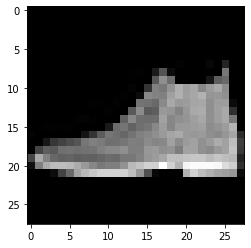

In [18]:
#Visualize the data
import matplotlib.pyplot as plt
%matplotlib inline

print(y_test[0])
plt.imshow(x_test[0], cmap="gray")

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
#Now we will reshape the input data for input to a convolutional neural network:

x_train = x_train.reshape(-1, 28, 28,1)
x_test = x_test.reshape(-1, 28, 28,1)


In [25]:
def build_model():  
    model = keras.models.Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten()) 

    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

model = build_model()
model.fit(x_train,y_train, 32, 5, validation_data=(x_test,y_test), verbose=1)

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 1.2475 - accuracy: 0.7358 - val_loss: 0.4303 - val_accuracy: 0.8470
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3936 - accuracy: 0.8591 - val_loss: 0.4057 - val_accuracy: 0.8578
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3447 - accuracy: 0.8737 - val_loss: 0.3732 - val_accuracy: 0.8716
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3261 - accuracy: 0.8809 - val_loss: 0.3553 - val_accuracy: 0.8703
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3039 - accuracy: 0.8885 - val_loss: 0.3556 - val_accuracy: 0.8759


In [27]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

import time
LOG_DIR = f"{int(time.time())}" #create a timebound ddirectory

# The final code examples

In [28]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import TensorBoard

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time
import pickle

LOG_DIR = f"{int(time.time())}"

tensorboard = TensorBoard(log_dir=LOG_DIR)

In [ ]:
'''
Label   Description
0   T-shirt/top
1   Trouser
2   Pullover
3   Dress
4   Coat
5   Sandal
6   Shirt
7   Sneaker
8   Bag
9   Ankle boot'''

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)  # reshaping for convnet
x_test = x_test.reshape(-1, 28, 28, 1)  # reshaping for convnet


def build_auto_model(hp):  # random search passes this hyperparameter() object 
    model = keras.models.Sequential()

    model.add(Conv2D(hp.Int('input_units',
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3), input_shape=x_train.shape[1:]))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for i in range(hp.Int('n_layers', 1, 4)):  # adding variation of layers.
        model.add(Conv2D(hp.Int(f'conv_{i}_units',
                                min_value=32,
                                max_value=256,
                                step=32), (3, 3)))
        model.add(Activation('relu'))

    model.add(Flatten()) 
    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    return model


tuner = RandomSearch(
    build_auto_model,
    objective='val_accuracy',
    max_trials=20,  # how many variations on model?
    executions_per_trial=2,  # how many trials per variation? (same model could perform differently)
    directory=LOG_DIR)

tuner.search_space_summary()

tuner.search(x=x_train,
             y=y_train,
             epochs=3,
             batch_size=64,
             callbacks=[tensorboard],
             validation_data=(x_test, y_test))

tuner.results_summary()

with open(f"tuner_{int(time.time())}.pkl", "wb") as f:
    pickle.dump(tuner, f)

Trial 9 Complete [01h 00m 47s]
val_accuracy: 0.8912500143051147

Best val_accuracy So Far: 0.893449991941452
Total elapsed time: 05h 08m 49s

Search: Running Trial #10

Hyperparameter    |Value             |Best Value So Far 
input_units       |160               |32                
n_layers          |4                 |3                 
conv_0_units      |128               |64                
conv_1_units      |224               |64                
conv_2_units      |192               |192               
conv_3_units      |64                |160               

Epoch 1/3
938/938 [==============================] - 647s 689ms/step - loss: 1.1735 - accuracy: 0.7487 - val_loss: 0.3734 - val_accuracy: 0.8673
Epoch 2/3
938/938 [==============================] - 646s 688ms/step - loss: 0.3223 - accuracy: 0.8842 - val_loss: 0.3095 - val_accuracy: 0.8895
Epoch 3/3
938/938 [==============================] - 644s 687ms/step - loss: 0.2781 - accuracy: 0.8976 - val_loss: 0.2977 - val_accuracy: 0.8

In [ ]:
tuner.get_best_models()[0].summary()